<a href="https://colab.research.google.com/github/rawanalharthi0/Text_Analysis/blob/main/Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rawan Alharthi 444001029**

**Mashael Abdali 444001062**

**Shaimaa Alghamdi 444000746**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import ComplementNB, MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report

nltk.download('punkt')
nltk.download('stopwords')

stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fake-news/train.csv')
df1 = pd.read_csv('/content/drive/MyDrive/fake-news/test.csv')

df

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Check the distribution of labels
print(df['label'].value_counts())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
label
1    10413
0    10387
Name: count, dtype: int64


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['id'])

# Handle missing values by filling with an empty string
df = df.fillna('')

In [ ]:
# Check for missing values after cleaning
print(df.isnull().sum())

# Check the distribution of labels
print(df['label'].value_counts())

title     0
author    0
text      0
label     0
dtype: int64
label
1    10413
0    10387
Name: count, dtype: int64


In [ ]:
df['news']=df['author']+" "+df['text']
df1['news']=df['author']+" "+df['text']

In [ ]:
df.drop(['title','author','text'],axis=1,inplace=True)

In [ ]:
df

,label,news
0,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,0,Daniel J. Flynn Ever get the feeling your life...
2,1,Consortiumnews.com Why the Truth Might Get You...
3,1,Jessica Purkiss Videos 15 Civilians Killed In ...
4,1,Howard Portnoy Print \nAn Iranian woman has be...
...,...,...
20795,0,Jerome Hudson Rapper T. I. unloaded on black c...
20796,0,Benjamin Hoffman When the Green Bay Packers lo...
20797,0,Michael J. de la Merced and Rachel Abrams The ...
20798,1,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


In [ ]:
# Text Preprocessing
# Stemming
stemmer = PorterStemmer()
# Stop Words
stop_words = set(stopwords.words('english'))

In [ ]:
# Remove URLs and non-alphanumeric characters
def preprocess_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
# Remove stop words and stem the words
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['news'] = df['news'].apply(preprocess_text)

<Axes: >

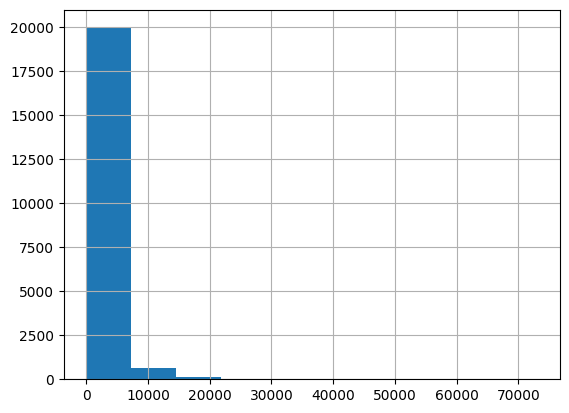

In [ ]:
# Calculate the length of each text in the 'news' column
df['news'].str.len().hist()

Text(0.5, 1.0, 'Fake News')

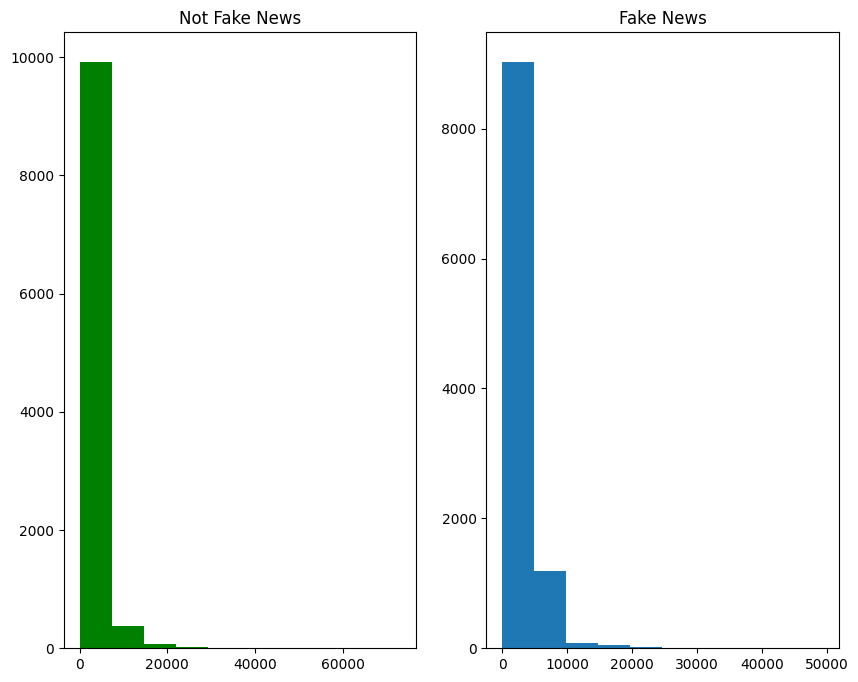

In [ ]:
# News Length Distribution 0 Fake vs. 1 Not Fake
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,8))
ax1.hist(df[df['label']==1]['news'].str.len(),color='green')
ax1.set_title( 'Not Fake News')
ax2.hist(df[df['label']==0]['news'].str.len())
ax2.set_title( 'Fake News')

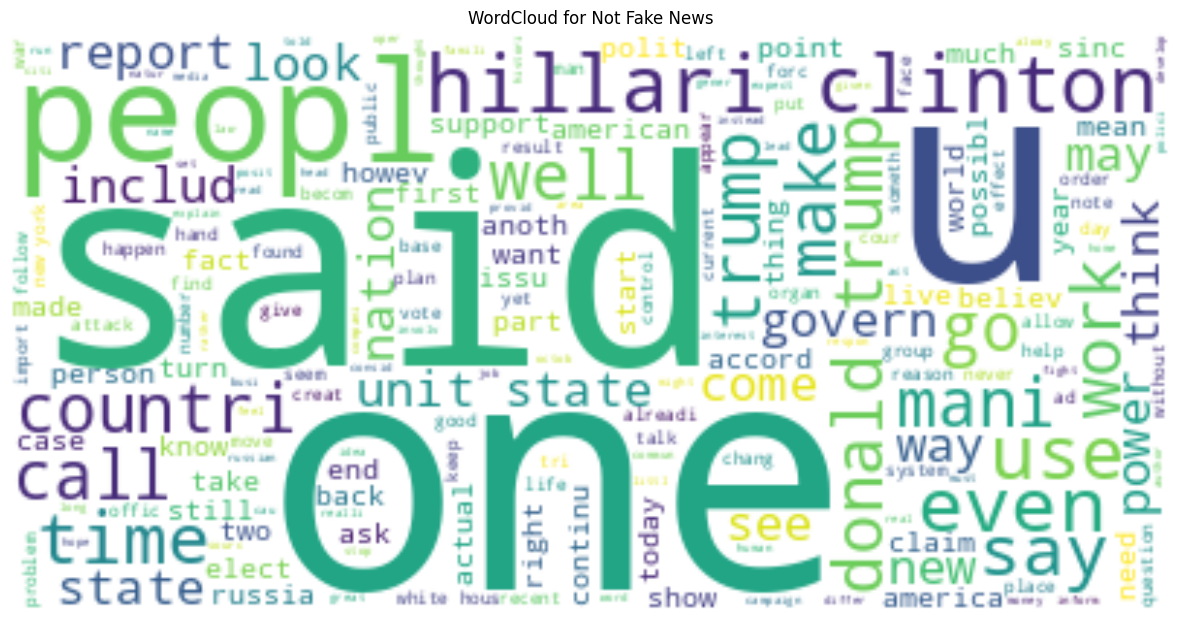

In [ ]:
# Word Cloud for Not Fake News (Label = 1)
text = " ".join(i for i in df[df['label']==1]['news'])
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Not Fake News')
plt.show()

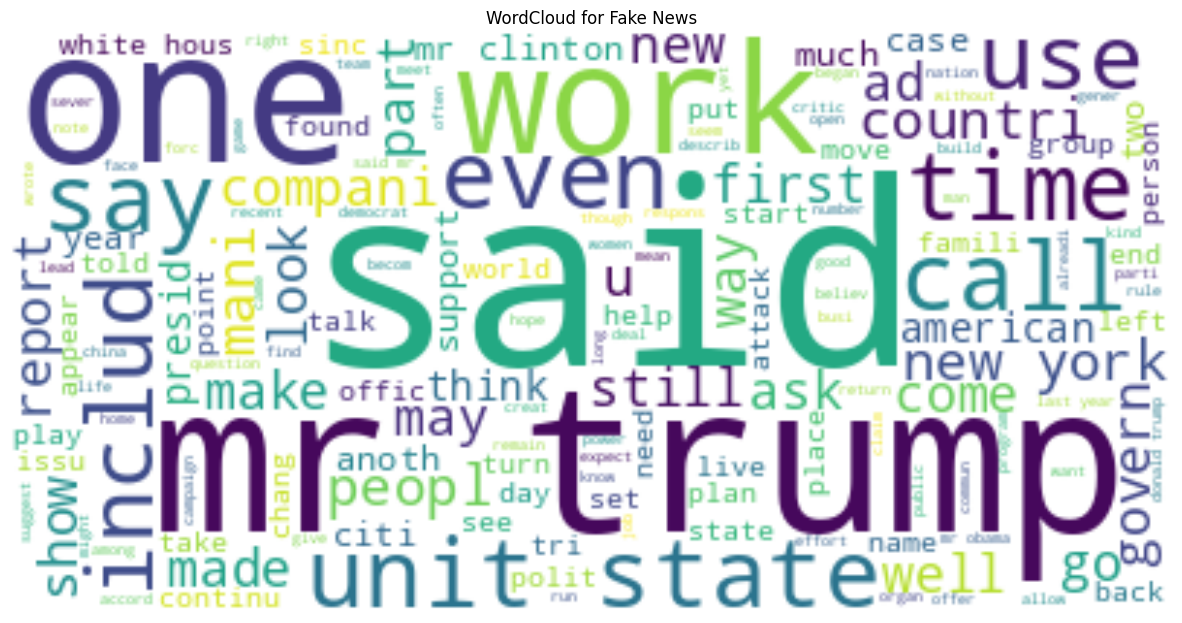

In [ ]:
# Word Cloud for Fake News (Label = 0)
text = " ".join(i for i in df[df['label']==0]['news'])
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('WordCloud for Fake News')
plt.show()

In [ ]:
# Top 10 Most Common Words in News Texts
cnt = Counter()
for text in df["news"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,said,80012
1,mr,71401
2,trump,55932
3,one,39784
4,state,39322
5,would,37237
6,peopl,36882
7,year,32196
8,like,31721
9,time,30606


In [ ]:
# Top 10 Most Common Words in News Texts
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)

In [ ]:
# TF-IDF vectors
x=df['news'].values
y=df['label'].values

word_vector=TfidfVectorizer()
x=word_vector.fit_transform(x)

In [ ]:
x

<20800x133559 sparse matrix of type '<class 'numpy.float64'>'
	with 5151357 stored elements in Compressed Sparse Row format>

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)

(16640, 133559)
(16640,)


In [ ]:
# Complement Naive Bayes
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
CNB = ComplementNB()
CNB.fit(x_train, y_train)

predicted = CNB.predict(x_test)

# The error was on this line. 'metrics.' should be removed before accuracy_score.
accuracy_score = accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 86.08%
------------------------------------------------
Confusion Matrix:
      0     1
0  2112    20
1   559  1469
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      2132
           1       0.99      0.72      0.84      2028

    accuracy                           0.86      4160
   macro avg       0.89      0.86      0.86      4160
weighted avg       0.89      0.86      0.86      4160



In [ ]:
# Logistic Regression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate our model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9526442307692308
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2132
           1       0.95      0.96      0.95      2028

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160

